<a href="https://colab.research.google.com/github/abeezith/abhivw-eip4/blob/master/Copy_of_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


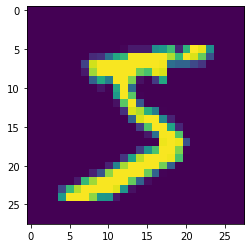

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(26,26,1)))
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(24,24,1)))
#model.add(Convolution2D(10, 24))
model.add(Convolution2D(10, 1, activation='relu'))

#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(22,22,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.70))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(10, activation='softmax'))
#model.add(Activation('softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(26, 26, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(24, 24, 1...)`
  import sys


In [14]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 22, 22, 10)        330       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1210)             

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 19s 322us/step - loss: 0.3596 - acc: 0.8869
Epoch 2/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.1556 - acc: 0.9522
Epoch 3/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.1256 - acc: 0.9614
Epoch 4/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.1083 - acc: 0.9668
Epoch 5/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0988 - acc: 0.9689
Epoch 6/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0911 - acc: 0.9725
Epoch 7/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0836 - acc: 0.9744
Epoch 8/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0834 - acc: 0.9746
Epoch 9/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0796 - acc: 0.9753
Epoch 10/10
60000/60000 [==============================] - 10s 171us/step 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)

[0.024313745988276788, 0.9913]


In [0]:
y_pred = model.predict(X_test)

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[4.21303187e-10 5.11928810e-08 8.76586199e-08 1.02186664e-06
  5.27896615e-10 5.46783507e-10 3.19016867e-14 9.99997139e-01
  4.36782749e-10 1.68523775e-06]
 [2.08601091e-06 1.24072714e-04 9.99873638e-01 6.80486636e-08
  1.84990356e-10 8.19521968e-12 1.38603307e-08 1.47527331e-07
  4.19468407e-08 1.32928779e-10]
 [1.07899915e-07 9.99993443e-01 2.37317479e-07 2.12216040e-08
  4.42330338e-06 9.80137305e-09 5.53479310e-07 9.42969166e-07
  2.15656968e-07 4.44105233e-08]
 [9.99911070e-01 1.16376384e-08 4.64182506e-07 1.32075252e-06
  2.22424141e-08 1.45764909e-06 7.71059204e-05 8.03080553e-08
  2.90044909e-06 5.53053042e-06]
 [7.35743422e-09 1.91367508e-06 4.44433361e-08 4.01738642e-09
  9.99953985e-01 1.13813581e-09 1.02606350e-08 1.02366710e-06
  2.06575606e-07 4.27565028e-05]
 [4.79098361e-08 9.99997854e-01 1.21704005e-07 7.06268555e-09
  9.51218794e-07 1.29269606e-09 6.07212485e-08 8.56397889e-07
  9.50705896e-08 2.67387712e-08]
 [3.91445383e-07 4.33613859e-05 2.04942899e-05 1.17443301e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

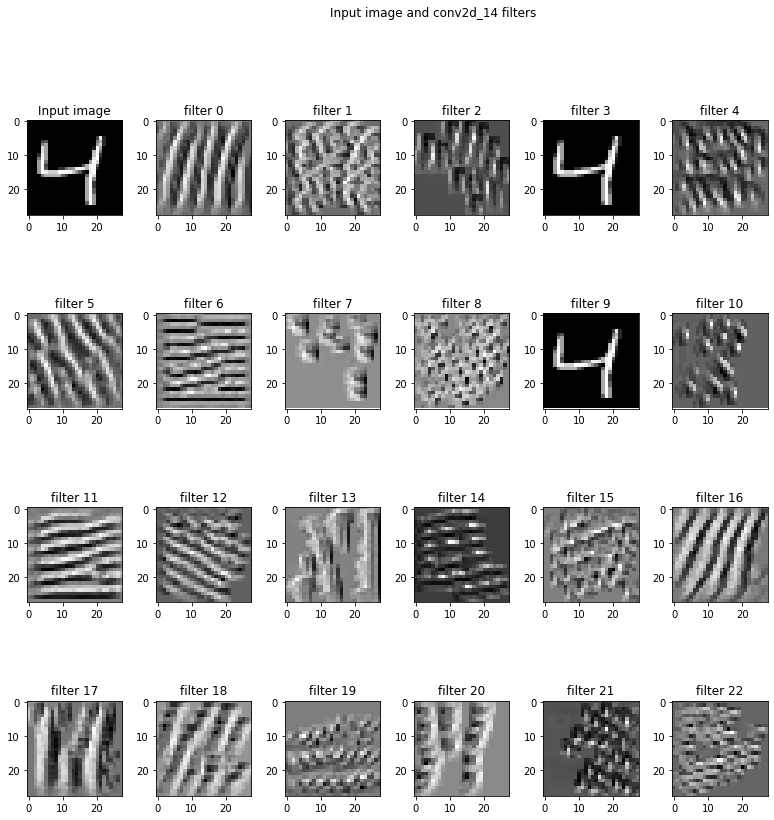

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()